# Time Between Stops

In [1]:
#First we import the requested modules
import pandas as pd
from pandas.io.json import json_normalize
import json

import math
import numpy as np

import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px
pio.templates.default = 'plotly_white'
pd.set_option("display.precision", 3)

import datetime
from datetime import timedelta

from pandarallel import pandarallel
from joblib import Parallel, delayed
import multiprocessing
num_cores = multiprocessing.cpu_count()
pandarallel.initialize()

INFO: Pandarallel will run on 16 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [2]:
#Available colors
colors = [
    '#1f77b4',  # muted blue
    '#ff7f0e',  # safety orange
    '#2ca02c',  # cooked asparagus green
    '#d62728',  # brick red
    '#9467bd',  # muted purple
    '#8c564b',  # chestnut brown
    '#e377c2',  # raspberry yogurt pink
    '#7f7f7f',  # middle gray
    '#bcbd22',  # curry yellow-green
    '#17becf'   # blue-teal
]

In [3]:
path = '../Data/Processed/'

In [4]:
# WE LOAD THE STOPS AND LINES
with open('../Data/Static/lines_dict.json', 'r') as f:
    lines_dict = json.load(f)

## Day types

## Time between stops

In [11]:
#Headways data
tbs = pd.read_csv('../Data/Processed/times_bt_stops.csv',
    dtype = {
        'line': 'str',
        'direction': 'uint16',
        'st_hour':'uint16',
        'end_hour':'uint16',
        'stopA': 'str',
        'stopB': 'str',
        'bus': 'str',
        'trip_time': 'float16',
        'api_trip_time': 'int16'
    }
)

In [19]:
tbs[(tbs.line == '132')]

,date,line,direction,st_hour,end_hour,stopA,stopB,bus,trip_time,api_trip_time
6088,2020-12-11,132,1,20,21,1686,1687,4839,51.188,50
6089,2020-12-11,132,1,20,21,1691,3273,4685,64.312,62
6090,2020-12-11,132,1,20,21,3273,3276,4839,67.438,20
6091,2020-12-11,132,1,20,21,3278,5140,4685,32.000,32
6092,2020-12-11,132,1,20,21,3278,5140,4815,33.000,33
...,...,...,...,...,...,...,...,...,...,...
44299,2021-02-08,132,2,22,23,1692,1690,4828,28.422,29
44300,2021-02-08,132,2,22,23,1692,1690,4835,37.812,38
44301,2021-02-08,132,2,22,23,1690,1688,4828,68.250,18
44302,2021-02-08,132,2,22,23,1688,1685,4837,53.969,53


In [28]:
stopA = '1690'
stopB = '1688'
tbsAB = tbs[(tbs.stopA == stopA) & (tbs.stopB == stopB)][['trip_time']]

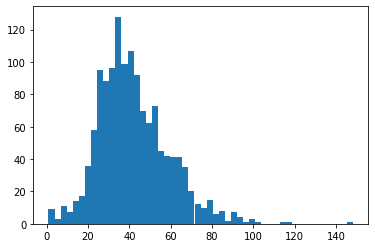

In [30]:
from matplotlib import pyplot
pyplot.hist(tbsAB,bins=50)
pyplot.show()

In [35]:
from scipy.stats import skewnorm, skewtest

In [40]:
# Test the data for skewness
print("Skewtest result: ", skewtest(tbsAB.trip_time.tolist()))

Skewtest result:  SkewtestResult(statistic=10.649065321508514, pvalue=1.761245315997049e-26)


In [47]:
# Fit the portfolio loss data to the skew-normal distribution
# estimate parameters from sample
ae, loce, scalee = skewnorm.fit(tbsAB.trip_time.tolist())
ae

2.5161477562299073

In [43]:
# Compute the 95% VaR from the fitted distribution, using parameter estimates
VaR_95 = skewnorm.ppf(0.95, *params)
print("VaR_95 from skew-normal: ", VaR_95)

VaR_95 from skew-normal:  73.04265314370375


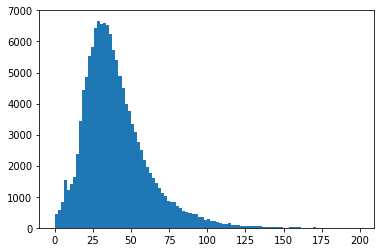

In [34]:
pyplot.hist(tbs[tbs.trip_time<200][['trip_time']],bins=100)
pyplot.show()

In [48]:
# Fit the portfolio loss data to the skew-normal distribution
# estimate parameters from sample
ae, loce, scalee = skewnorm.fit(tbs.trip_time.tolist())
ae

4.664957959227601